# Glass Quality Prediction

We humans have been using glass since ancient times for a variety of applications from building construction to making decorative objects. With technology, glass and its applications have evolved, and today, we have different varieties of glass used for very different purposes from a computer monitor to a bulletproof car window depending on the grade of the glass produced. And not all grades or varieties are manufactured the same way. In this data science challenge, you as a data scientist must use the given data to predict the grade of the glass produced based on the given factors.

### Data Description:-

    Train.csv – 1358 observations.
    Test.csv – 583 observations.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#from xgboost import XGBClassifier

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout

import keras.backend as K

Using TensorFlow backend.


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
from sklearn.decomposition import TruncatedSVD

In [7]:
# read the train and test datasets
train_df = pd.read_csv('./Glass_Quality_Participants_Data/Train.csv')
print("The train data size : {} ".format(train_df.shape))

test_df = pd.read_csv('./Glass_Quality_Participants_Data/Test.csv')
print("The test data size : {} ".format(test_df.shape))

The train data size : (1358, 16) 
The test data size : (583, 15) 


In [8]:
train_df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [9]:
train_df.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [10]:
test_df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [11]:
train_df.isna().any()

grade_A_Component_1    False
grade_A_Component_2    False
max_luminosity         False
thickness              False
xmin                   False
xmax                   False
ymin                   False
ymax                   False
pixel_area             False
log_area               False
x_component_1          False
x_component_2          False
x_component_3          False
x_component_4          False
x_component_5          False
class                  False
dtype: bool

In [12]:
train_df.dtypes

grade_A_Component_1      int64
grade_A_Component_2      int64
max_luminosity           int64
thickness                int64
xmin                     int64
xmax                     int64
ymin                     int64
ymax                     int64
pixel_area               int64
log_area               float64
x_component_1            int64
x_component_2            int64
x_component_3            int64
x_component_4            int64
x_component_5            int64
class                    int64
dtype: object

### Correlation and Data Normalization

In [13]:
df1 = train_df.loc[:, train_df.columns != 'class']
df2 = test_df.copy()
df = df1.append(df2, ignore_index=True)
df.shape

(1941, 15)

In [14]:
df.corr()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
grade_A_Component_1,1.000000,-1.000000,-0.189398,0.125735,0.144336,0.112055,0.075178,0.075163,-0.235254,-0.235255,-0.054792,0.339488,-0.407730,-0.154796,-0.082489
grade_A_Component_2,-1.000000,1.000000,0.189398,-0.125735,-0.144336,-0.112055,-0.075178,-0.075163,0.235254,0.235255,0.054792,-0.339488,0.407730,0.154796,0.082489
max_luminosity,-0.189398,0.189398,1.000000,-0.108190,-0.069791,-0.059099,-0.062571,-0.062552,0.102239,0.102237,-0.041783,-0.172831,0.160839,0.072448,0.010398
thickness,0.125735,-0.125735,-0.108190,1.000000,0.135998,0.105631,-0.208083,-0.208083,-0.182606,-0.182606,0.076165,-0.023559,-0.348974,-0.100499,0.018345
xmin,0.144336,-0.144336,-0.069791,0.135998,1.000000,0.988302,0.041758,0.041743,-0.307271,-0.307271,0.134958,-0.228868,-0.419369,0.073798,0.103782
xmax,0.112055,-0.112055,-0.059099,0.105631,0.988302,1.000000,0.052009,0.051998,-0.225367,-0.225366,0.119787,-0.258291,-0.336107,0.061456,0.096582
ymin,0.075178,-0.075178,-0.062571,-0.208083,0.041758,0.052009,1.000000,1.000000,0.017808,0.017806,0.036476,-0.063310,-0.000423,-0.066604,0.064257
ymax,0.075163,-0.075163,-0.062552,-0.208083,0.041743,0.051998,1.000000,1.000000,0.017980,0.017979,0.036491,-0.063331,-0.000403,-0.066606,0.064257
pixel_area,-0.235254,0.235254,0.102239,-0.182606,-0.307271,-0.225367,0.017808,0.017980,1.000000,1.000000,-0.076718,-0.087790,0.556697,-0.071250,-0.050343
log_area,-0.235255,0.235255,0.102237,-0.182606,-0.307271,-0.225366,0.017806,0.017979,1.000000,1.000000,-0.076717,-0.087789,0.556698,-0.071249,-0.050343


In [15]:
train_df_new = train_df.drop(['xmin', 'ymin', 'pixel_area'], axis = 1) 
test_df_new = test_df.drop(['xmin', 'ymin', 'pixel_area'], axis = 1) 

In [16]:
df1 = train_df_new.loc[:, train_df_new.columns != 'class']
df2 = test_df_new.copy()
df = df1.append(df2, ignore_index=True)
df.shape

(1941, 12)

#### SVD

In [165]:
svd = TruncatedSVD(2)
glass_transformed = svd.fit_transform(df.values)

In [166]:
glass_transformed

array([[ 9.47332114e+05, -1.31004908e+02],
       [ 2.37962394e+06, -1.10308188e+03],
       [ 1.03675416e+06, -3.22678905e+02],
       ...,
       [ 5.11803745e+05,  2.08878949e+04],
       [ 1.38019590e+05,  9.08799527e+03],
       [ 1.41399796e+06, -8.27597110e+02]])

In [171]:
glass_transformed_train = glass_transformed[:len(train_norm_df)]
glass_transformed_test = glass_transformed[len(train_norm_df):]

In [172]:
print (len(glass_transformed_train))
print (len(glass_transformed_test))

1358
583


In [173]:
print (len(glass_transformed_train))
print (len(glass_transformed_test))

1358
583


In [180]:
glass_svd = pd.DataFrame(glass_transformed_train, columns = ['A','B'])
glass_svd['type'] = train_df['class']

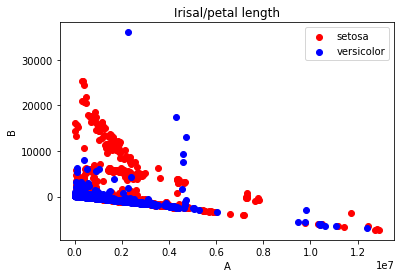

In [183]:
plot1 = plt.scatter(glass_svd[glass_svd['type'] == 1]['A'], glass_svd[glass_svd['type'] == 1]['B'], c = 'red')
plot2 = plt.scatter(glass_svd[glass_svd['type'] == 2]['A'], glass_svd[glass_svd['type'] == 2]['B'], c = 'blue')
plt.xlabel('A')
plt.ylabel('B')
plt.legend([plot1, plot2], ['setosa', 'versicolor', ])
plt.title('Irisal/petal length')
plt.show()

In [17]:
# fit scaler on training data
norm = MinMaxScaler().fit(df)

In [18]:
# transform training data
train_norm = norm.transform(df1)

# transform testing dataabs
test_norm = norm.transform(df2)

In [19]:
train_norm_df = pd.DataFrame(train_norm, columns=train_df_new.columns[:-1])
test_norm_df = pd.DataFrame(test_norm, columns=train_df_new.columns[:-1])

### Model Ready Data

In [146]:
# X = train_df.loc[:, train_df.columns != 'class']
# y = train_df[["class"]]

# # dividing X, y into train and test data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10) 

In [20]:
X = train_norm_df
#X = train_df.loc[:, train_df.columns != 'class']
y = train_df[["class"]]
#y = y -1

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10) 

## Build Model

In [103]:
dtree_model = DecisionTreeClassifier(max_depth = 35).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [104]:
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

0.8419117647058824


#### logistic regression

In [140]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_pred = lr.predict(X_test)

In [142]:
lr.predict_proba(X_test)

array([[0.97332988, 0.02667012],
       [0.55988197, 0.44011803],
       [0.55550366, 0.44449634],
       [0.94692017, 0.05307983],
       [0.97316708, 0.02683292],
       [0.98073486, 0.01926514],
       [0.97771944, 0.02228056],
       [0.39935293, 0.60064707],
       [0.9804275 , 0.0195725 ],
       [0.97682419, 0.02317581],
       [0.17075724, 0.82924276],
       [0.36435544, 0.63564456],
       [0.34468145, 0.65531855],
       [0.30852336, 0.69147664],
       [0.98180959, 0.01819041],
       [0.16919457, 0.83080543],
       [0.31802752, 0.68197248],
       [0.22945712, 0.77054288],
       [0.98029493, 0.01970507],
       [0.31781858, 0.68218142],
       [0.5534819 , 0.4465181 ],
       [0.480875  , 0.519125  ],
       [0.97708902, 0.02291098],
       [0.94024515, 0.05975485],
       [0.55119315, 0.44880685],
       [0.13799245, 0.86200755],
       [0.32760754, 0.67239246],
       [0.97852085, 0.02147915],
       [0.31719865, 0.68280135],
       [0.31457118, 0.68542882],
       [0.

In [143]:
generateFile(lr)

#### Random Forest

In [66]:
#05/22/20
# classifier = RandomForestClassifier(n_estimators = 300, 
#                                     random_state = 9, 
#                                     max_features=10
#                                    )

In [38]:
classifier = RandomForestClassifier(n_estimators = 500, 
                                    random_state = 25, 
                                    max_features=9,
                                    criterion='entropy',
                                    min_samples_split = 2,  
                                    min_samples_leaf = 2
                                   )

In [44]:
classifier = RandomForestClassifier()

In [39]:
classifier.fit(X_train, y_train)

/opt/anaconda3/envs/dpln/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_features=9, min_samples_leaf=2,
                       n_estimators=500, random_state=25)

In [32]:
classifier = RandomForestClassifier(n_estimators = 300, 
                                    random_state = 9, 
                                    max_features=9, 
                                    bootstrap = True,
                                    #max_depth = 5, 
                                    min_samples_split = 2,  
                                    min_samples_leaf = 2
                                   )
classifier.fit(X_train, y_train)

/opt/anaconda3/envs/dpln/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(max_features=9, min_samples_leaf=2, n_estimators=300,
                       random_state=9)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
print(accuracy_score(y_test, y_pred))

0.8823529411764706


In [45]:
# classifier = RandomForestClassifier(n_estimators = 300, 
#                                     random_state = 9, 
#                                     max_features=10
#                                    )
classifier.fit(X, y)

/opt/anaconda3/envs/dpln/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

In [46]:
#classifier.predict_proba(X_test)
# final_predictions = classifier.predict_proba(test_norm_df)
# final_df = pd.DataFrame(final_predictions, columns=["1","2"])

In [47]:
generateFile(classifier)

### ANN

In [55]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_cat = to_categorical(y)

In [123]:
K.clear_session()

model = Sequential()
model.add(Dense(9, input_dim=12))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['mean_absolute_error'])

#h1 = model.fit(X_train, y_train_cat, batch_size=32, epochs=500, verbose=0)
#h1 = model.fit(X_train, y_train_cat, batch_size=32, epochs=500, verbose=0, validation_split=0.2)
h1 = model.fit(X, y_cat, batch_size=32, epochs=500, verbose=0, validation_split=0.2, shuffle=True)
#h2 = model.fit(X, y_cat, batch_size=32, epochs=500, verbose=0)

In [107]:
model.evaluate(X_test, y_test_cat)

272/272 [==============================] - 0s 59us/step


[0.33421505023451414, 0.232826828956604]

In [66]:
h2 = model.fit(X, y_cat, batch_size=32, epochs=500, verbose=0)

In [75]:
ynew = model.predict_classes(test_norm_df)

In [126]:
generateFile(model)

Text(0.5, 0, 'Epochs')

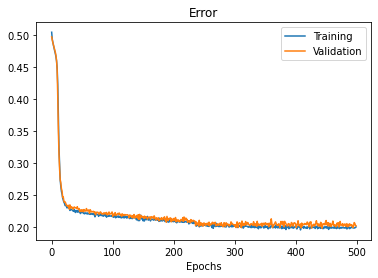

In [124]:
plt.plot(h1.history['mean_absolute_error'])
plt.plot(h1.history['val_mean_absolute_error'])
plt.legend(['Training', 'Validation'])
plt.title('Error')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

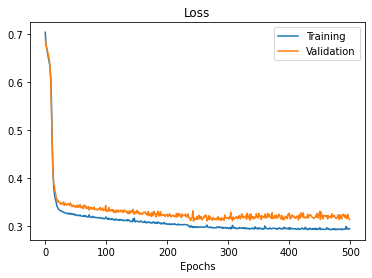

In [125]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epochs')

#### Generate Final DF and File

In [26]:
def generateFile(model):
    final_predictions = model.predict_proba(test_norm_df)
    #final_predictions = model.predict_proba(test_df)
    final_df = pd.DataFrame(final_predictions, columns=["1","2"])
    final_df.to_excel(r'result.xlsx', index = None)